## Chapter 1 – The Machine Learning landscape

_This is the code used to generate some of the figures in chapter 1._

### Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


### Code example 1-1

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [4]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#

! dir

print("\nOK")

zsh:1: command not found: dir

OK


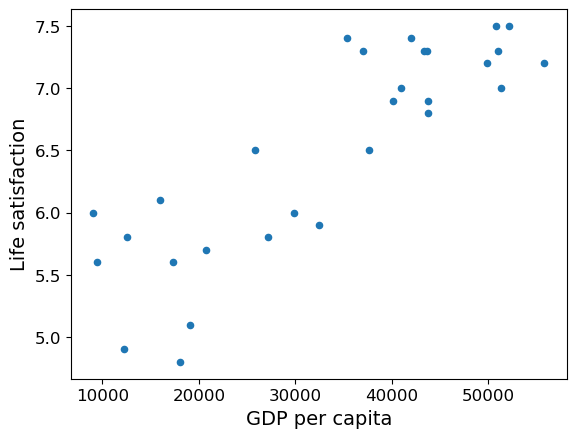

[[5.96242338]]
OK


In [5]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

## SWMAL

Now we plot the linear regression result.

Just ignore all the data plotter code mumbo-jumbo here (code take dirclty from the notebook, [GITHOML])...and see the final plot.

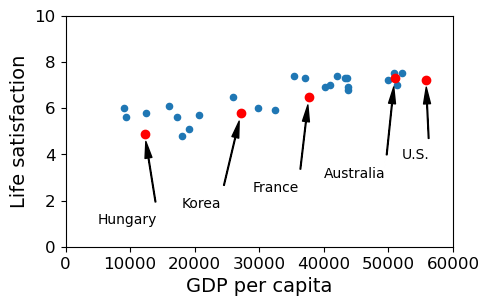

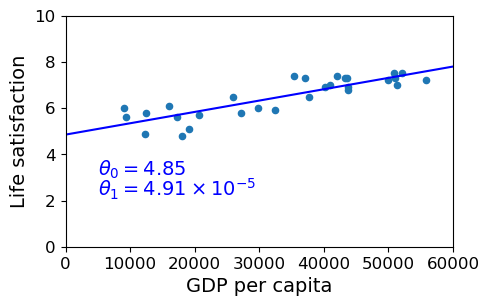

OK


In [6]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Ultra-brief Intro to the Fit-Predict Interface in Scikit-learn

OK, the important lines in the cells above are really just
```python
#Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

```

What happens here is that we create  model, called LinearRegression (for now just a 100% black-box method), put in our data training $\mathbf{X}$ matrix and corresponding desired training ground thruth vector $\mathbf{y}$ (aka $\mathbf{y}_{true})$, and then train the model. 

After training we extract a _predicted_ $\mathbf{y}_{pred}$ vector from the model, for some input scalar $x$=22587. 


### Supervised Training via Fit-predict

The train-predict (or train-fit) process on some data can be visualized as

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/supervised_learning.png" alt="WARNING: could not get image from server." style="height:250px">

In this figure the untrained model is a `sklearn.linear_model.LinearRegression` python object. When trained via  `model.fit()`, using some know answers for the data, $\mathbf{y}_{true}~$, it becomes a blue-boxed trained model.

The trained model can be used to _predict_ values from new, yet-unseen, data, via the `model.predict()` function. 

In other words, how high is life-satisfaction for Cyprus' GDP=22587 USD?

Just call `model.predict()` on a matrix with one single numerical element, 22587, well, not a matrix really, but a python list-of-lists, `[[22587]]`  

```y_pred = model.predict([[22587]])```

Apparently 5.96 the models answers!

(you get used to the python built-in containers and numpy on the way..)

### Qa) The $\theta$ parameters and the $R^2$ Score

Here we show how to extract the $\theta$ parameters from a linear regression model mainly from the life-satisfaction figure above by using Python attributes. We will furthermore explain the $R^2$ score measures in broad terms.


$$
\begin{array}{rcll}
    R^2 &=& 1 - u/v\\
    u   &=& \sum (y_{true} - y_{pred}~)^2   ~~~&\small \mbox{residual sum of squares}\\
    v   &=& \sum (y_{true} - \mu_{true}~)^2 ~~~&\small \mbox{total sum of squares}
\end{array}
$$

with $y_{true}~$ being the true data, $y_{pred}~$ being the predicted data from the model and $\mu_{true}~$ being the true mean of the data.

In general, the minimum and maximum values of 𝑅² (R-squared) range from 0 to 1. A value of 0 indicates that the model's predictions are entirely wrong and provide no explanation for the variance in the dependent variable. Conversely, a value of 1 signifies a perfect fit, where the model accurately predicts the dependent variable based on the independent variables, explaining all of the variance. Therefore, 𝑅² measures the goodness of fit, with higher values indicating a better fit and predictive power.

Negative 𝑅² values are possible and suggest that the model is not the right fit and its predictions are less accurate.

Here we show how to extract the score=0.734 for the model by using data (X,y)

In [7]:
theta1 = model.intercept_
theta2 = model.coef_[0]

print(f"Theta1: {theta1}, Theta2: {theta2}")

Rsquared = model.score(X,y)

print(f"Rsquared: {Rsquared}") 

Theta1: [4.8530528], Theta2: [4.91154459e-05]
Rsquared: 0.734441435543703


## The Merits of the Fit-Predict Interface

Now comes the really fun part: all methods in Scikit-learn have this fit-predict interface, and you can easily interchange models in your code just by instantiating a new and perhaps better ML model.

There are still a lot of per-model parameters to tune, but fortunately, the built-in default values provide you with a good initial guess for good model setup.

Later on, you might want to go into the parameter detail trying to optimize some params (opening the lid of the black-box ML algo), but for now, we pretty much stick to the default values.

Let's try to replace the linear regression now, let's test a _k-nearest neighbour algorithm_ instead (still black boxed algorithm-wise)...


### Qb) Using k-Nearest Neighbors

In this exercise, we'll explore K-nearest neighbors as a supervised learning classifier and compare it to linear regression. K-nearest neighbors utilizes the k nearest data points from the training dataset, with the default value of k being 5 if left unchanged. Both K-nearest neighbors and linear regression models share the same fit and predict methods.

To assess model performance, we can compare their scores, which provide insights into how well each model performs. While the score alone may not definitively determine the superior model, we can draw conclusions by examining the relative scores. If one model yields a score close to zero while another model approaches a score of 1, we can infer that the latter model performs better in this hypothetical scenario. T

We've used the K-nearest neighbor regressor from sklearn which can be found:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [ ]:
# this is our raw data set:
sample_data

In [ ]:
# and this is our preprocessed data
country_stats

In [ ]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model

# Instantiate

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X,y)


# Predict and print the knn = 5.766667
print(f"K-nearestneighbor prediction for Cypress: {knn.predict(X_new)}")# neighbors = ..
print(f"Linearregression prediction for Cypress: {lin1.predict(X_new)}")

X.shape= (29, 1)
y.shape= (29, 1)

K-nearestneighbor prediction for Cypress: [[5.76666667]]
Linearregression prediction for Cypress: [[5.96242338]]

It can be seen that the prediction for K-nearest-3 for Cyprus is 5.77. As mentioned on page 29 in the book, an instance-based learning algorithm would have identified Slovenia as the closest match to Cyprus in terms of GDP per capita. Based on OECD data, Slovenia has a 'life satisfaction' score of 5.7, so one could predict that Cyprus also would have a 'life satisfaction' score of 5.7. Taking into account the two next closest countries, Portugal (5.1) and Spain (6.5), the average of the three scores is 5.77, which is what K-nearest-3 predicts.

This demonstrates that the two predictions are quite close to each other. However, the difference arises because linear regression and K-nearest neighbors are two different algorithms.

In linear regression, the algorithm attempts to find a single linear function that best fits the entire dataset. This linear function represents the average relationship between the independent and dependent variables for the entire dataset.

In K-nearest neighbors, the prediction is calculated by averaging the values of the nearest neighbors using a user-defined parameter k (in this case, k = 3). This means that the prediction can vary depending on the nearest neighbors selected. It is more adaptive to local patterns in the data.

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

Here we will delve into the parameter tuning for k-nearest neighbors. By adjusting this parameter, we will explore its functionality and perform a sanity check. We will address why having a score close to 1 does not necessarily mean that k-nearest neighbors is the ideal estimator for the task at hand.

The issue with k-nearest neighbors producing a score of 1 is that it relies on a prediction based solely on the single closest value, which can lead to overfitting. As illustrated in the graph where K=1, the line closely follows the data points and exhibits overfitting.

Conversely, having a k-nearest neighbor with a very large value can also pose problems because it fails to capture the underlying data patterns, as seen in the example below where K=20.

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/regression_with_knn.png"  alt="WARNING: could not get image from server." style="height:150px">

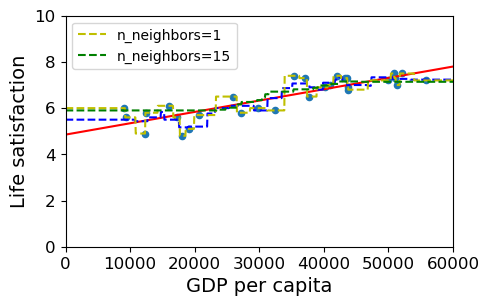

In [22]:
from sklearn.neighbors import KNeighborsRegressor

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = KNeighbors.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b--")

KNeighbors1 = KNeighborsRegressor(n_neighbors=1)
KNeighbors15 = KNeighborsRegressor(n_neighbors=15)

KNeighbors1.fit(X,y)
KNeighbors1Predict = KNeighbors1.predict(M)

KNeighbors15.fit(X,y)
KNeighbors15Predict = KNeighbors15.predict(M)

plt.plot(m,KNeighbors1Predict, "y--", label="n_neighbors=1")
plt.plot(m,KNeighbors15Predict,"g--", label="n_neighbors=15")

plt.legend()

### Qd) Trying out a Neural Network

Here we will explore the use of a neural network for regression, specifically the Multi-Layer Perceptron (MLP) regressor, which can be found here:https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

Let us then try a Neural Network on the data, using the fit-predict interface allows us to replug a new model into our existing code.

There are a number of different NN's available, let's just hook into Scikit-learns Multi-Layer Perceptron for regression, that is an 'MLPRegressor'. 

Now, the data-set for training the MLP is really not well scaled, so we need to tweak a lot of parameters in the MLP just to get it to produce some sensible output: with out preprocessing and scaling of the input data, `X`, the MLP is really a bad choice of model for the job since it so easily produces garbage output. 

Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

Can the `MLPRegressor` score function be compared with the linear and KNN-scores?

Iteration 1, loss = 290434295.23044360
Iteration 2, loss = 286926974.91845930
Iteration 3, loss = 283445091.80120462
Iteration 4, loss = 279989007.88284469
Iteration 5, loss = 276559070.05886543
Iteration 6, loss = 273155609.32856679
Iteration 7, loss = 269778940.07033998
Iteration 8, loss = 266429359.38609847
Iteration 9, loss = 263107146.52031821
Iteration 10, loss = 259812562.35816020
Iteration 11, loss = 256545849.00610602
Iteration 12, loss = 253307229.45747605
Iteration 13, loss = 250096907.34413812
Iteration 14, loss = 246915066.77466321
Iteration 15, loss = 243761872.25819016
Iteration 16, loss = 240637468.71230754
Iteration 17, loss = 237541981.55239332
Iteration 18, loss = 234475516.85906243
Iteration 19, loss = 231438161.61967900
Iteration 20, loss = 228429984.03930050
Iteration 21, loss = 225451033.91592681
Iteration 22, loss = 222501343.07455072
Iteration 23, loss = 219580925.85422322
Iteration 24, loss = 216689779.64216977
Iteration 25, loss = 213827885.44891000
Iteration

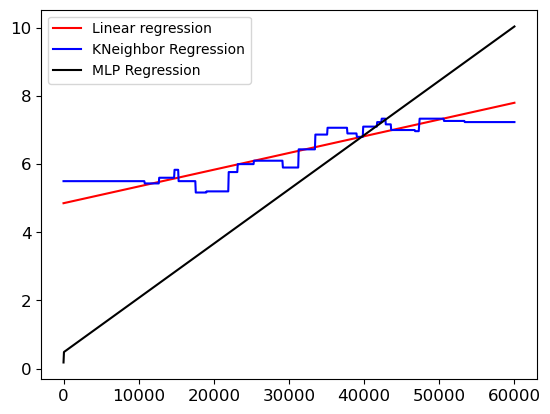

In [23]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r", label="Linear regression")
plt.plot(m, y_pred_knn, "b", label="KNeighbor Regression")
plt.plot(m, y_pred_mlp, "k", label="MLP Regression")
plt.legend()

print(f"Linear regression score: {lin1.score(X,y)}")
print(f"KNeighbor regression score: {KNeighbors.score(X,y)}")
print(f"MLP regression score:{mlp.score(X,y)}")

The grade (score) for a Multi-Layer Perceptron (MLP) neural network model can vary each time the model is trained. This is because the MLP adapts to the data in different ways during each training session. Sometimes the score can be negative, other times positive, or even zero. The score is a measure of how well the model fits the given data.

If the score is very negative, it means that the MLP does not fit the data well and cannot predict it correctly. This may indicate that the model needs adjustments or optimization to provide better results.

It is also important to note that data must be properly preprocessed before being fed into the MLP. If the data is not correctly scaled or prepared, it can negatively impact the outcome. Therefore, prior scaling or data preparation may be necessary to achieve better performance from the MLP.

So, the score for the MLP is a useful metric for assessing how well it fits the data, and it can prompt further adjustments to improve its performance.